<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_3/Assignment_3/Assignment_3_Template_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3.1
Zachariah Freitas

In [1]:
# All IMPORTS you may need! 

import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron


# Turn off warnings to make results look cleaner.
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

**KNN on Audio Drum Data**

One key to designing a k-nearest neighbor model is a good choice of the distance metric. By
working through these examples (in order), you will overcome a few challenges in applying distances
to datasets. Use scikit-learn’s neighbors. `KNeighborsClassifier` to train a classifier on each of the
provided datasets.
For all three datasets, because they are small in size, you will use most of the data for training.
For all model, do a cross-validation split using:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)`

Load the Drum sounds dataset. Remember that these data are vectors, and each value is the
amount of power (signal intensity) at that particular frequency. Use the distance metric euclidean.
Next, staying with the Euclidean metric, increase the number of neighbors from1 to 9, only using
odd numbers. Save the accuracy at each value of k, and you will be plotting them later. Change
the distance metric to Manhattan distance. Again, vary the number of numbers and plot results
for accuracy using both distance metrics on the Drum dataset. Plot both the training and test set
errors as below.

*2.1 Euclidean Distance*

In [2]:
#Load Audio dataset  here
audio_df = pd.read_csv('https://raw.githubusercontent.com/zachfreitas/ADS_504_Machine_Learning/main/Module_3/Assignment_3/drum_data.csv')

In [3]:
#Split the data into train and test, random state= 42 and 90% of data for training
X = audio_df.drop(['Unnamed: 0','filename','label_text','label'], axis=1)
le = LabelEncoder()
labels = audio_df['label_text']
le.fit(labels)
y=le.transform(labels)

# Split the dataset using the following line:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Create helper functions

In [4]:
#This function is supposed to create and test a KNN model

def k_neighbors(xtrain, ytrain, xtest, ytest, kvalues, metric):
  knn_accuracy = []
  clfs = []
  for i in kvalues:
    clf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(xtrain, ytrain)
    clf_train_pred = clf.predict(xtrain)
    clf_test_pred = clf.predict(xtest)
    clfs.append(clf)
    knn_accuracy.append({'k values': i,
    'Training Accuracy':accuracy_score(clf_train_pred,ytrain),
    'Test Accuracy': accuracy_score(clf_test_pred,ytest)})
  return pd.DataFrame(knn_accuracy), clfs

def plot_k_neighbors(k_neighbors_df, error=False, title = 'KNN'):
  if error==True:
    plt.plot(k_neighbors_df['k values'], 1 - k_neighbors_df['Training Accuracy'], linewidth=2, label='Training Accuracy',linestyle='dashed',marker='o')
    plt.plot(k_neighbors_df['k values'], 1 - k_neighbors_df['Test Accuracy'], linewidth=2, label='Test Accuracy',linestyle='dashed',marker='o')
    plt.ylabel('Error Rate = 1-Accuracy') 
  else:
    plt.plot(k_neighbors_df['k values'], k_neighbors_df['Training Accuracy'], linewidth=2, label='Training Accuracy', linestyle='dashed',marker='o')
    plt.plot(k_neighbors_df['k values'], k_neighbors_df['Test Accuracy'], linewidth=2, label='Test Accuracy',linestyle='dashed',marker='o')
    plt.ylabel('Accuracy Rate')
  plt.xlabel('k Neighbors')
  plt.title(title)
  plt.legend()
  plt.show()

*KNN with k ∈ [1, 9]*

*KNN using L2 norm*

In [5]:
knn_euc_acc, knn_euc_clfs = k_neighbors(X_train, y_train, X_test, y_test,list(range(1,9+1,2)), 'euclidean')   #Define the range of 1 to 10 and the type as euclidean
display(knn_euc_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,1.000000
1,3,0.978947,0.954545
2,5,0.978947,0.954545
3,7,0.978947,0.954545
4,9,0.978947,0.954545


K*NN L2 norm with k ∈ [0, 9] Accuracy plot*

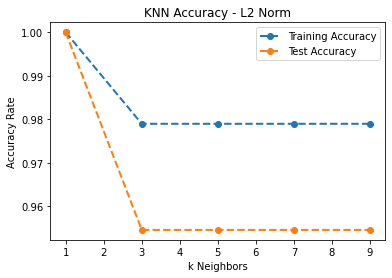

In [6]:
#KNN L2 norm with k ∈ [0, 9] Accuracy plot here
plot_k_neighbors(knn_euc_acc, error=False, title = 'KNN Accuracy - L2 Norm')

**2.2 Manhattan Distance**

*KNN using L1 norm*

In [7]:
# Repeat same model this time with 'manhatan'
knn_man_acc, knn_man_clfs = k_neighbors(X_train, y_train, X_test, y_test,list(range(1,9+1,2)), 'manhattan')   #Define the range of 1 to 10 and the type as euclidean
display(knn_man_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.954545
1,3,0.978947,0.954545
2,5,0.978947,0.954545
3,7,0.978947,0.954545
4,9,0.978947,0.954545


KNN L1 norm with k ∈ [0, 9] Accuracy plot

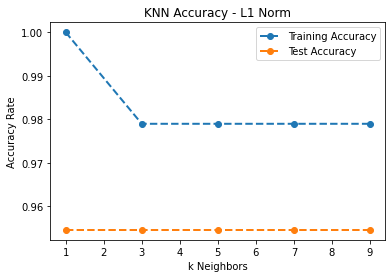

In [8]:
#KNN L1 norm with k ∈ [0, 9] Accuracy plot here
plot_k_neighbors(knn_man_acc, error=False, title = 'KNN Accuracy - L1 Norm')


**3 KNN on Animal Shelter Data** 

Next, you will try the animal shelter data. To convert these categorical features to a vector, use
`enc = OneHotEncoder(sparse=‘False’)`. Read the documentation on what `oneHotEncoder` is doing,
and note how large the transformed data are. Plot a graph of accuracy using k varying from 1 to
9 and using Cosine as the distance.

In [9]:
# Read the Shelter dataset
shelter_df = pd.read_csv('https://raw.githubusercontent.com/zachfreitas/ADS_504_Machine_Learning/main/Module_3/Assignment_3/shelter_data.csv')

In [10]:
# Drop null values on Anima Data
cleaned_data = shelter_df.dropna()
# Define y as 'OutcomeType' and X as {'Name', 'DateTime', 'AnimalType', 'SexuponOutcome','AgeuponOutcome', 'Breed', 'Color'}
X_data = cleaned_data[['Name', 'DateTime', 'AnimalType', 'SexuponOutcome','AgeuponOutcome', 'Breed', 'Color']]
y_data = cleaned_data[['OutcomeType']]

# one-hot encode
ohe = OneHotEncoder(sparse=False).fit(X_data[['Name', 'AnimalType', 'SexuponOutcome','Breed', 'Color']])

# ordinal
ord = OrdinalEncoder().fit(X_data[['DateTime', 'AgeuponOutcome']])
cat_df = pd.DataFrame(ohe.transform(X_data[['Name', 'AnimalType', 'SexuponOutcome','Breed', 'Color']]),
                      columns=ohe.get_feature_names(['Name', 'AnimalType','SexuponOutcome', 'Breed','Color']))
ord_df = pd.DataFrame(ord.transform(X_data[['DateTime', 'AgeuponOutcome']]),
                      columns=['DateTime', 'AgeuponOutcome'])

# concat the categoricals and ordinals
X = pd.concat([cat_df, ord_df], axis=1)
le = LabelEncoder()
y = le.fit(y_data).transform(y_data)

# split data to 90% for training with the random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [11]:
# Repeat the same strategy above. Design the KNN in range of 1 to 10 with skip of 2 
# this time use 'Cosine'
knn_cos_acc, knn_cos_clfs = k_neighbors(X_train, y_train, X_test, y_test,list(range(1,9+1,2)), 'cosine')   #Define the range of 1 to 10 and the type as euclidean
display(knn_cos_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.575931
1,3,0.770896,0.571633
2,5,0.729183,0.587393
3,7,0.717879,0.631805
4,9,0.713103,0.643266


KNN Cosine Similarity with k ∈ [0, 9] Accuracy plot

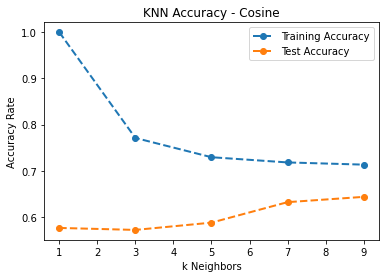

In [12]:
# Same as previous steps, KNN Cosine Similarity with k ∈ [0, 9] Accuracy plot
plot_k_neighbors(knn_cos_acc, error=False, title = 'KNN Accuracy - Cosine')

**4 KNN on Text Data**

Finally, load the text data using count_hamilton.csv. You will again use k-nearest neighbors to
build a classifier, varying the number of neighbors from 1 to 9. Use both Cosine and Euclidean
distance to plot accuracy as the number of neighbors increases.

In [13]:
# Read text data
text_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_3/Assignment_3/count_hamilton.csv')


In [14]:
# Drop meta_author and meta_title
X = text_df.drop(['Unnamed: 0','meta_author','meta_title'], axis=1)

# Use label encoder as you did in previous assignment and create 90% of data for training in random state of 42
le = LabelEncoder()
labels = text_df['meta_author']
le.fit(labels)
y=le.transform(labels)

# Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**4.1 Euclidean Distance**

KNN L2 norm

In [15]:
# Same strategy as before, create euclidean for the range of K
knn_euc_acc, knn_euc_clfs = k_neighbors(X_train, y_train, X_test, y_test,list(range(1,9+1,2)), 'euclidean')   #Define the range of 1 to 10 and the type as euclidean
display(knn_euc_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.777778
1,3,0.868421,0.777778
2,5,0.723684,0.888889
3,7,0.736842,0.888889
4,9,0.710526,0.777778


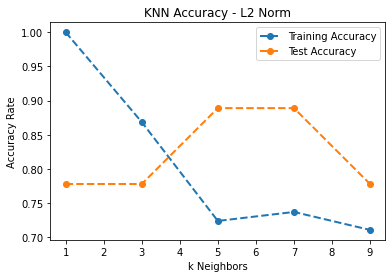

In [16]:
#KNN L2 norm with k ∈ [0, 9] Accuracy plot
plot_k_neighbors(knn_euc_acc, error=False, title = 'KNN Accuracy - L2 Norm')

**4.2 Cosine**

KNN Cosine similarity

In [17]:
# Same strategy as before, create cosine for the range of K
knn_cos_acc, knn_cos_clfs = k_neighbors(X_train, y_train, X_test, y_test,list(range(1,9+1,2)), 'cosine')   #Define the range of 1 to 10 and the type as euclidean
display(knn_cos_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.777778
1,3,0.934211,0.777778
2,5,0.842105,0.777778
3,7,0.828947,0.666667
4,9,0.855263,0.666667


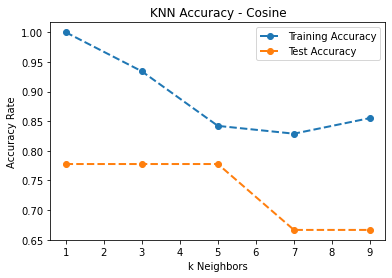

In [18]:
#KNN Cosine Similarity with k ∈ [0, 9] Accuracy plot
plot_k_neighbors(knn_cos_acc, error=False, title = 'KNN Accuracy - Cosine')

**5 Perceptron Implementation.**

Load the audio (Drum) dataset. Make sure you have plus and minus ones for labels. For example,
you can modify the labels like this:

```
y = le.transform(labels)
y[y==0] = -1
```

Write the following functions:

`predict_perceptron(X,w)`

This takes a dataset and a weight vector and returns all the predictions that would be made by a
perceptron.

`train_perceptron(X,w)`

Returns w, the trained weight vector. This will take the form of a for loop over all the data points,
checking against the pseudocode in the text.
Train and test your perceptron using the audio (Drum) dataset. In addition, use scikit-learn’s
perceptron classifier and compare. Verify that both your implementation and the built-in one are
obtaining similar accuracy values.

In [19]:
#Load Audio dataset  here
audio_df = pd.read_csv('https://raw.githubusercontent.com/zachfreitas/ADS_504_Machine_Learning/main/Module_3/Assignment_3/drum_data.csv')

In [20]:
#Split the data into train and test, random state= 42 and 90% of data for training
X = audio_df.drop(['Unnamed: 0','filename','label_text','label'], axis=1)
le = LabelEncoder()
labels = audio_df['label_text']
le.fit(labels)
y=le.transform(labels)

# Create X and y (label_text). This time the encoding is different and is between -1 and 1 so wherever y is equal to 0, convert it to -1
y[y==0] = -1
#aud_labels = le.classes_
aud_labels = list(le.inverse_transform([0, 1]))
# Split the dataset using the following line:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Perceptron Implementation

Implementing Perceptron Classifier using python/numpy

In [21]:
class PerceptronClassifier():
  def __init__(self, maxiter):
    # hyperparameter
    self.maxiter = maxiter
  def train_perceptron(self, X, y):
    # initialize weights, bias
    self.w = np.zeros(X.shape[1])
    self.b = 0
    for i in range(self.maxiter):
      for j in range(X.shape[0]):
        a = sum(self.w * X.iloc[j]) + self.b
        if y[j] * a <= 0:
          # update weights
          self.w += y[j] * X.iloc[j]
          self.b += y[j]
    # return trained weights, bias
    return self.w, self.b
  def predict_perceptron(self, X):
    a = [sum(self.w * x) + self.b for i, x in X.iterrows()]
    return np.sign(a).astype(int)

Implemented Perceptron and predictions

In [22]:
perc = PerceptronClassifier(1)
aud_weghts, aud_bias = perc.train_perceptron(X_train, y_train)

perc_cm = confusion_matrix(y_test, perc.predict_perceptron(X_test))
pd.DataFrame(perc_cm, index=aud_labels, columns=aud_labels)

,kick,snare
kick,10,0
snare,0,12


In [23]:
print('Implemented Perceptron Accuracy %2.2f ' % accuracy_score(y_test, perc.predict_perceptron(X_test)))

Implemented Perceptron Accuracy 1.00 


Scikit-Learn Perceptron and predictions

In [24]:
sk_perc = Perceptron(max_iter=1).fit(X_train, y_train)

sk_perc_cm = confusion_matrix(y_test, sk_perc.predict(X_test))
pd.DataFrame(sk_perc_cm, index=aud_labels, columns=aud_labels)

,kick,snare
kick,10,0
snare,1,11


In [25]:
print('Scikit-Learn Perceptron Accuracy %2.2f ' % accuracy_score(y_test,sk_perc.predict(X_test)))

Scikit-Learn Perceptron Accuracy 0.95 
